# Training

Train network with own training data (example data in folder 'data').


For training, 4 inputs are **necessary**:
    - horizontal eye position (in deg)
    - vertical eye position (in deg)
    - ground truth labels for saccades (encoded as 1). Additional labels are optional (e.g. post-saccadic oscillation, encoded as 2 etc.)
    - sampling frequency of the eye tracker
    
**Optional** input arguments are:
    - min_sacc_dur: minimum saccade duration (in ms) for removal of small saccades (post-processing), default: 1==no removal
    - min_sacc_dist: minimum distance between two saccades for merging of close-by saccades, default: 1==no merge
    - weights_name: filename for storage of trained weights. All trained weights will automatically be safed in the local folder 'training'. The default filename is 'weights'
    - classes: the number of classes to be classified. Default is 2 (fixation and saccade)
  
  
Call the model with **uneye.DNN()** and then run training with the method **model.train()**

In [1]:
### Parameters ###
datapath = 'data/Synthetic/'
min_sacc_dur = 6 #minimum saccade duration in ms
min_sacc_dist = 10 #minimum saccade distance in ms
sampfreq = 1000 #Hz
weights_name = 'weights_synthetic'

In [2]:
import numpy as np
import uneye
import scipy.io as io

# load synthetic example data (.csv)
Xtrain = np.loadtxt(datapath+'X_1000hz.csv',delimiter=',')
Ytrain = np.loadtxt(datapath+'Y_1000hz.csv',delimiter=',')
Ltrain = np.loadtxt(datapath+'Labels_1000hz.csv',delimiter=',')

# example dataset is large, so use only subset for training:
ntrain = 1000 #samples for training
Xtrain = Xtrain[:ntrain,:]
Ytrain = Ytrain[:ntrain,:]
Ltrain = Ltrain[:ntrain,:]

# load .mat example data
#Xtrain,Ytrain,Ltrain = io.loadmat(datapath+'X_train.mat')['X'],io.loadmat(datapath+'Y_train.mat')['Y'],io.loadmat(datapath+'Sacc_train.mat')['Sacc']

# fit model on training data
# weights will automatically be saved to local folder 'training'
model = uneye.DNN(weights_name=weights_name,
                 sampfreq=sampfreq,
                 min_sacc_dur=min_sacc_dur,
                 min_sacc_dist=min_sacc_dist)
model.train(Xtrain,Ytrain,Ltrain)
# during training, the current iteration and maximum number of iterations is shown. Usually, training is stopped early.

Early stopping at epoch 57 because overfitting was detected.s
Model parameters saved to ./training/weights_synthetic


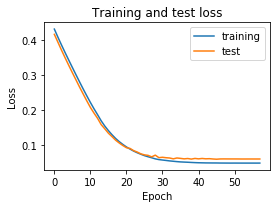

In [3]:
#plot loss
import matplotlib.pyplot as plt
f = plt.figure(figsize=(4,3))

plt.plot(model.loss_train,label='training')
plt.plot(model.loss_val,label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and test loss')
plt.legend()
plt.tight_layout()
plt.show()

### Test after training network
Test performance with separate test data (here, synthetic example data is used).


For testing, 4 inputs are **necessary**:
    - horizontal eye position (in deg)
    - vertical eye position (in deg)
    - ground truth labels for saccades (encoded as 1). Additional labels are optional (e.g. post-saccadic oscillation, encoded as 2 etc.)
    - sampling frequency of the eye tracker
    
**Optional** input arguments are:
    - threshold: probability threshold for prediction of saccades (only if 2 classes present in the data). The threshold is validated during training (see output above). Default: 0.5
    - min_sacc_dur: minimum saccade duration (in ms) for removal of small saccades (post-processing)
    - weights_name: filename of stored trained weights in the folder 'training'. If the model was called and trained before (as in this example), specifying weights_name is not necessary as the trained network will be used.
    - classes: the number of classes to be classified. Default is 2 (fixation and saccade)
  
  
Call the model with **ueye.DNN()** and then run training with the method **model.test()**

Or directly apply **model.test()** to the trained model.

In [4]:
# load example test data
Xtest = np.loadtxt(datapath+'X_1000hz.csv',delimiter=',')
Ytest = np.loadtxt(datapath+'Y_1000hz.csv',delimiter=',')
Ltest = np.loadtxt(datapath+'Labels_1000hz.csv',delimiter=',')

# reduce data to subset that wasn't used for training (ONLY NEEDED FOR THIS EXAMPLE)
Xtest = Xtest[ntrain:,:]
Ytest = Ytest[ntrain:,:]
Ltest = Ltest[ntrain:,:]

# test performance (here on subset of data that wasn't used for training)
Prediction,Probability,Performance = model.test(Xtest,Ytest,Ltest)

Binary Cohens Kappa:  0.966
F1: 0.985


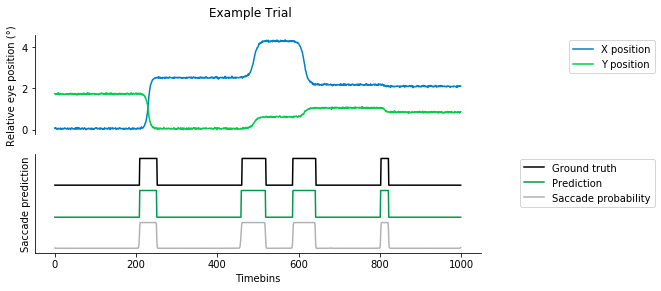

In [5]:
# plot example
i = np.random.randint(Xtest.shape[0])
fig = plt.figure(figsize=(8,4))
plt.suptitle('Example Trial')
ax = fig.add_subplot(211)
x_trace = Xtest[i,:] - np.min(Xtest[i,:])
y_trace = Ytest[i,:] - np.min(Ytest[i,:])
plt.plot(x_trace,label='X position',c=[0,0.5,0.8])
plt.plot(y_trace,label='Y position',c=[0,0.8,0.3])
plt.xticks(())
plt.ylabel('Relative eye position (°)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.legend(bbox_to_anchor=(1.4,1))

# prediction
ax = fig.add_subplot(212)
plt.plot(Ltest[i,:]+2.4,label='Ground truth',c='k')
plt.plot(Prediction[i,:]+1.2,label='Prediction',c=[0,0.6,0.3])
plt.plot(Probability[i,:],label='Saccade probability',c='k',alpha=.3)
plt.yticks(())
plt.ylabel('Saccade prediction')
plt.xlabel('Timebins')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(bbox_to_anchor=(1.4,1))
plt.show()

# Saccade prediction with pretrained network
Predict eye-movements in data (example data from smooth pursuit task in folder 'data/smooth_pursuit').


For prediction, 3 inputs are **necessary**:
    - horizontal eye position (in deg)
    - vertical eye position (in deg)
    - sampling frequency of the eye tracker
    
**Optional** input arguments are:
    - weights_name: filename of stored trained weights in the folder 'training'. Default: 'weights'.
    - threshold: probability threshold for prediction of saccades (only if 2 classes present in the data). The threshold is validated during training (see output above). Default: 0.5
    - min_sacc_dur: minimum saccade duration (in ms) for removal of small saccades (post-processing)
    - classes: the number of classes to be classified. Default is 2 (fixation and saccade)
  
Call the model with **ueye.DNN()** and then run training with the method **model.predict()**

In [9]:
import numpy as np
### Parameters ###
sampfreq = 1000 #Hz
weights_name = 'weights_synthetic'
min_sacc_dur = 6 # in ms
min_sacc_dist = 10 #in ms

# load data
datapath = 'data/Synthetic/' #example data

# load example data
Xtest = np.loadtxt(datapath+'X_1000hz.csv',delimiter=',')
Ytest = np.loadtxt(datapath+'Y_1000hz.csv',delimiter=',')


In [10]:
import uneye
# Prediction
model = uneye.DNN(weights_name=weights_name,
                 sampfreq=sampfreq,
                 min_sacc_dur=min_sacc_dur,
                min_sacc_dist=min_sacc_dist)
Prediction,Probability = model.predict(Xtest,Ytest)

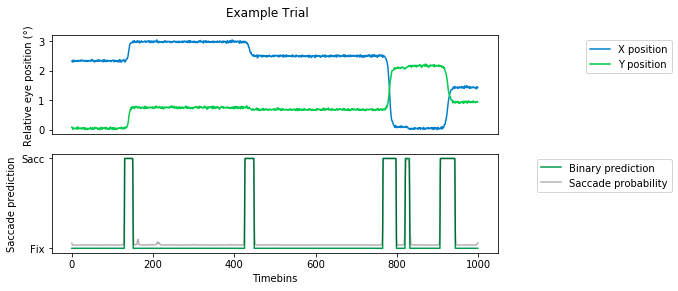

In [13]:
import matplotlib.pyplot as plt
# plot example
i = np.random.randint(Xtest.shape[0])
fig = plt.figure(figsize=(8,4))
plt.suptitle('Example Trial')
ax = fig.add_subplot(211)
x_trace = Xtest[i,:] - np.min(Xtest[i,:])
y_trace = Ytest[i,:] - np.min(Ytest[i,:])
plt.plot(x_trace,label='X position',c=[0,0.5,0.8])
plt.plot(y_trace,label='Y position',c=[0,0.8,0.3])
plt.xticks(())
plt.ylabel('Relative eye position (°)')
plt.legend(bbox_to_anchor=(1.4,1))

# prediction
ax = fig.add_subplot(212)
plt.plot(Prediction[i,:],label='Binary prediction',c=[0,0.6,0.3])
plt.plot(Probability[i,1,:],label='Saccade probability',c='k',alpha=.3)
plt.yticks((0,1),['Fix','Sacc'])
plt.ylabel('Saccade prediction')
plt.xlabel('Timebins')
plt.legend(bbox_to_anchor=(1.4,1))
plt.show()